In [1]:
solution_len = 13

In [ ]:
!pip install etna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.9/475.9 kB 12.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 77.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: f

In [2]:
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('/kaggle/input/quant/train.csv')
test = pd.read_csv('/kaggle/input/quant/test.csv')
train['dt'] = pd.to_datetime(train['dt'])
test['dt'] = pd.to_datetime(test['dt'])

In [5]:
train

,dt,high,low,close
0,2022-03-17,0.929970,0.955385,0.874680
1,2022-03-18,0.890062,0.794351,0.748082
2,2022-03-19,0.500000,0.630676,0.500000
3,2022-03-20,0.533471,0.500000,0.677750
4,2022-03-23,0.837281,0.897308,0.759592
...,...,...,...,...
56,2022-06-05,2.810762,3.030359,2.966752
57,2022-06-08,2.712925,2.751848,2.583120
58,2022-06-09,2.403965,2.441658,2.365729
59,2022-06-10,2.380793,2.540655,2.434783


In [6]:
test

,dt,high,low,close
0,2022-06-12,2.557158,2.594773,2.703325
1,2022-06-15,2.654994,2.718849,2.819694
2,2022-06-16,2.803038,3.011880,2.846548
3,2022-06-17,2.859681,2.946146,2.824808
4,2022-06-18,3.257466,3.040259,3.329923
5,2022-06-22,3.043769,3.143875,3.080562
6,2022-06-23,2.947219,3.101637,2.974425
7,2022-06-24,2.994464,3.060718,2.859335
8,2022-06-25,3.081745,3.254752,3.239131
9,2022-06-26,3.251030,3.406547,3.401534


* Глянуть Prohet
* Попробовать ансамбль нового LSTM и Sarimax
* Попробовать Ансамбль LSTM и Prohet
* Улучшать Sarimax

# Использование SARIMA

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['close'])

adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]
ic_best = result[5]

print('Результаты теста Дики-Фуллера:')
print(f'ADF Статистика: {adf_statistic}')
print(f'p-значение: {p_value}')
print(f'Использовано лагов: {used_lag}')
print(f'Количество наблюдений: {n_obs}')
print('Критические значения:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print("Ряд стационарен (отвергаем нулевую гипотезу)")
else:
    print("Ряд нестационарен (принимаем нулевую гипотезу)")


Результаты теста Дики-Фуллера:
ADF Статистика: -1.8360695425145985
p-значение: 0.3627068400178843
Использовано лагов: 0
Количество наблюдений: 60
Критические значения:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
Ряд нестационарен (принимаем нулевую гипотезу)


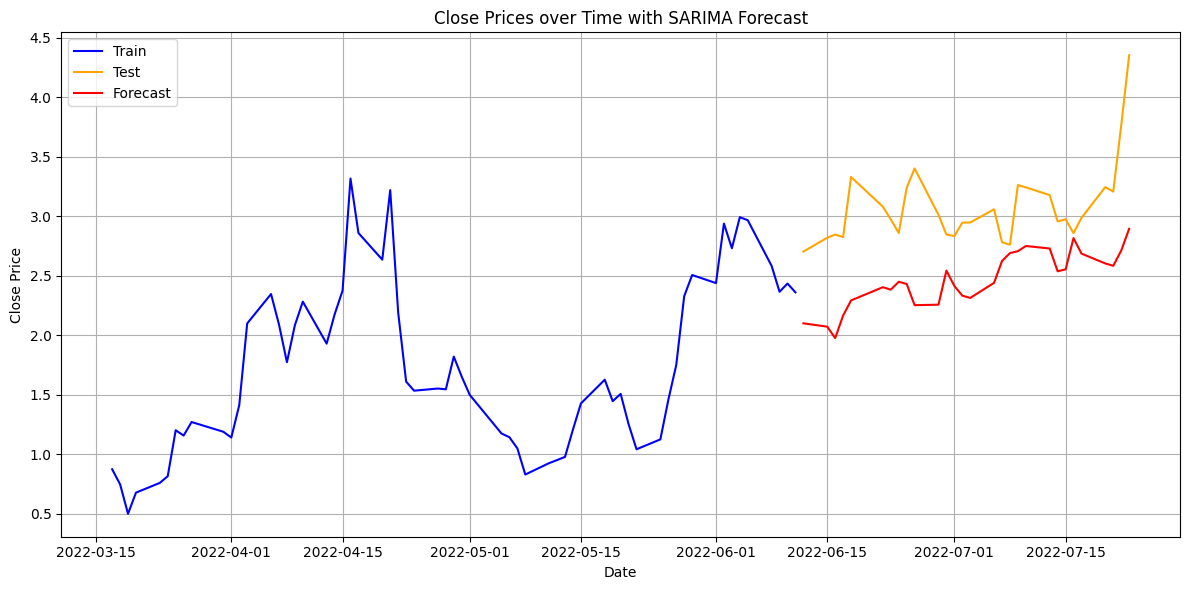

In [9]:
model = SARIMAX(train['close'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

plt.figure(figsize=(12, 6))
plt.plot(train['dt'], train['close'], label='Train', color='blue')
plt.plot(test['dt'], test['close'], label='Test', color='orange')
plt.plot(test['dt'], forecast, label='Forecast', color='red')
plt.title('Close Prices over Time with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Вычисление RMSE

In [10]:
rmse = np.sqrt(mean_squared_error(test['close'], forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.68


# НеБедный подбор гиперпараметров

In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials

def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), int(params['S']))
    
    try:
        model = SARIMAX(train['close'], order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)

        aic = results.aic
        bic = results.bic

        forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)
        
        rmse = np.sqrt(mean_squared_error(test['close'], forecast))
        mae = mean_absolute_error(test['close'], forecast)
        mape = mean_absolute_percentage_error(test['close'], forecast)
        
        loss = 0.5 * rmse + 0.25 * mae + 0.25 * mape
        
        return {'loss': loss, 'status': STATUS_OK, 'aic': aic, 'bic': bic, 'rmse': rmse, 'mae': mae, 'mape': mape}
    except Exception as e:
        print(f"Ошибка: {e}")
        return {'loss': 1e6, 'status': STATUS_FAIL} 

space = {
    'p': hp.quniform('p', 0, 5, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 5, 1),
    'P': hp.quniform('P', 0, 5, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 5, 1),
    'S': hp.choice('S', [6, 12, 24])
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=300, trials=trials)

best_params = {
    'order': (int(best['p']), int(best['d']), int(best['q'])),
    'seasonal_order': (int(best['P']), int(best['D']), int(best['Q']), [6, 12, 24][best['S']])
}

print("Лучшие параметры:")
print(best_params)

full_train = pd.concat([train, test])
model_full = SARIMAX(full_train['close'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results_full = model_full.fit(disp=False)

start_point = len(full_train)
end_point = start_point + solution_len - 1
forecast_solution = results_full.predict(start=start_point, end=end_point, dynamic=True)

100%|██████████| 300/300 [19:03<00:00,  3.81s/trial, best loss: 0.27441423257251624]
Лучшие параметры:
{'order': (0, 0, 5), 'seasonal_order': (0, 2, 2, 6)}


In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials

def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), int(params['S']))
    
    try:
        model = SARIMAX(train['close'], order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)

        forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)
        
        rmse = np.sqrt(mean_squared_error(test['close'], forecast))
        mae = mean_absolute_error(test['close'], forecast)
        aic = results.aic
        
        loss = rmse + mae + aic * 0.01
        
        return {'loss': loss, 'status': STATUS_OK}
    except Exception as e:
        print(f"Ошибка: {e}")
        return {'loss': 1e6, 'status': STATUS_FAIL}

space = {
    'p': hp.quniform('p', 0, 5, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 5, 1),
    'P': hp.quniform('P', 0, 5, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 5, 1),
    'S': hp.choice('S', [6, 12, 24]) 
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=300, trials=trials)

best_params = {
    'order': (int(best['p']), int(best['d']), int(best['q'])),
    'seasonal_order': (int(best['P']), int(best['D']), int(best['Q']), [6, 12, 24][best['S']])
}

print("Лучшие параметры:")
print(best_params)


100%|██████████| 300/300 [12:08<00:00,  2.43s/trial, best loss: 1.0589296093511973] 
Лучшие параметры:
{'order': (5, 2, 1), 'seasonal_order': (0, 0, 1, 6)}


In [11]:
submission = pd.DataFrame({
    'ID': range(1, (solution_len) + 1),
    'close': forecast_solution.values
})

In [30]:

full_train = pd.concat([train, test])
model_full = SARIMAX(full_train['close'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results_full = model_full.fit(disp=False)

start_point = len(full_train)
end_point = start_point + solution_len - 1
forecast_solution = results_full.predict(start=start_point, end=end_point, dynamic=True)

submission = pd.DataFrame({
    'ID': range(1, (solution_len) + 1),
    'close': forecast_solution.values
})

In [31]:
submission

,ID,close
0,1,4.041753
1,2,4.314590
2,3,4.441545
3,4,4.374345
4,5,4.335139
5,6,4.320493
6,7,4.000452
7,8,4.286969
8,9,4.458532
9,10,4.387463


RMSE: 0.68
MAE: 0.61
MAPE: 0.19


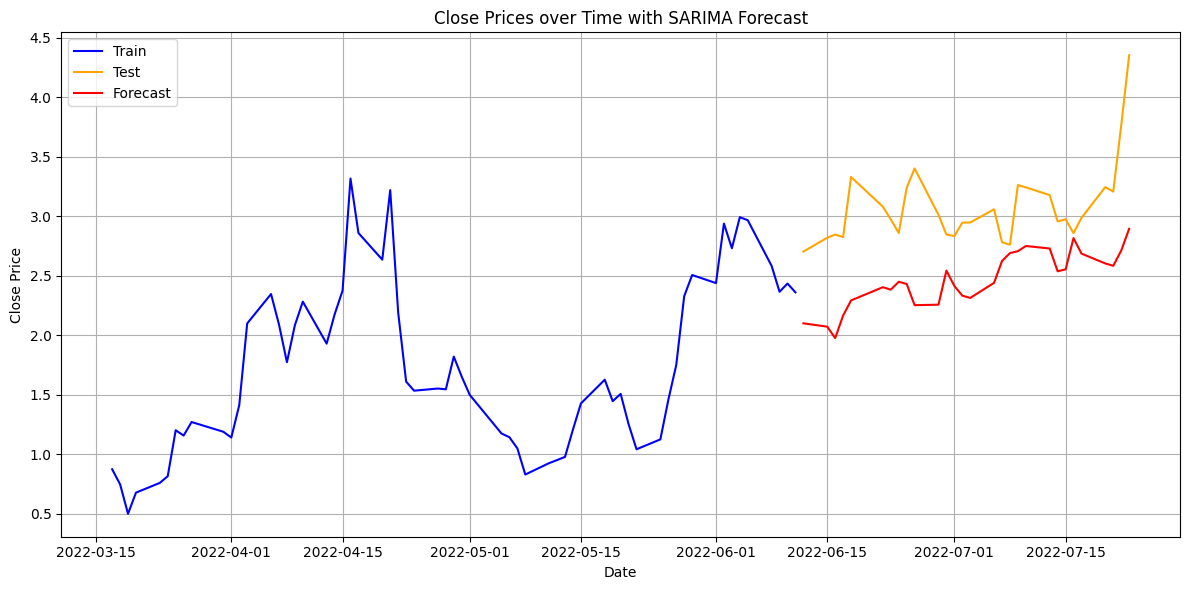

In [32]:
rmse = np.sqrt(mean_squared_error(test['close'], forecast))
mae = mean_absolute_error(test['close'], forecast)
mape = mean_absolute_percentage_error(test['close'], forecast)

print(f"RMSE: {rmse:.2f}")
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')
plt.figure(figsize=(12, 6))
plt.plot(train['dt'], train['close'], label='Train', color='blue')
plt.plot(test['dt'], test['close'], label='Test', color='orange')
plt.plot(test['dt'], forecast, label='Forecast', color='red')
plt.title('Close Prices over Time with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
submission.to_csv('sample_submission_sari_068.csv', index=False)

In [ ]:
def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), 12)
    
    try:
        model = SARIMAX(train['close'], order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)
        forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
        rmse = np.sqrt(mean_squared_error(test['close'], forecast))
        return {'loss': rmse, 'status': STATUS_OK}
    except:
        return {'status': STATUS_FAIL}

space = {
    'p': hp.quniform('p', 0, 3, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1),
    'P': hp.quniform('P', 0, 3, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 3, 1)
}

# Оптимизация
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Лучшие параметры:")
print(best)

### График потерь со временем

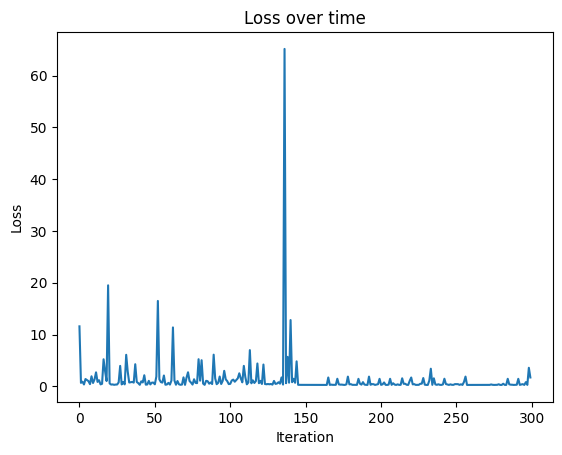

In [33]:
losses = [x['result']['loss'] for x in trials.trials if x['result']['status'] == 'ok']
plt.plot(losses)
plt.title('Loss over time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Распределение гиперпараметров

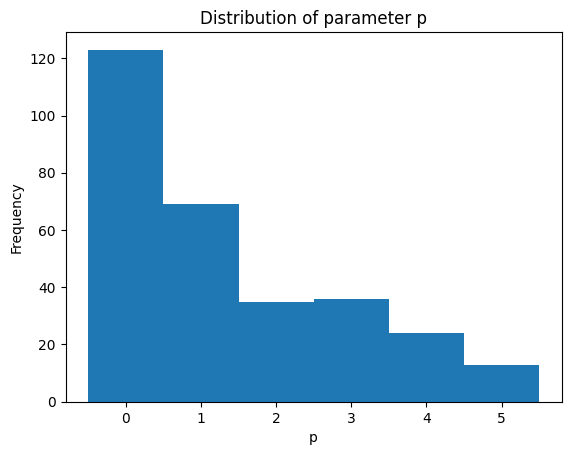

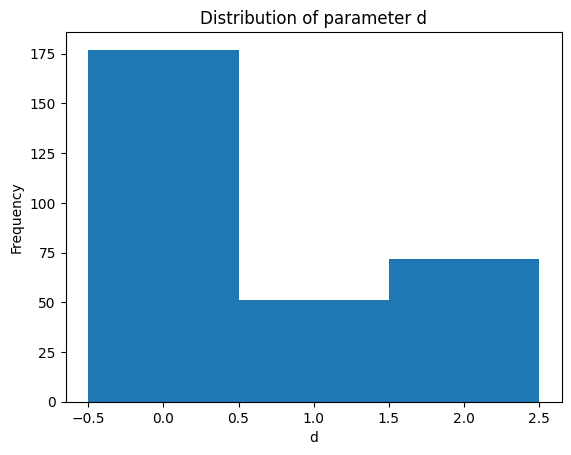

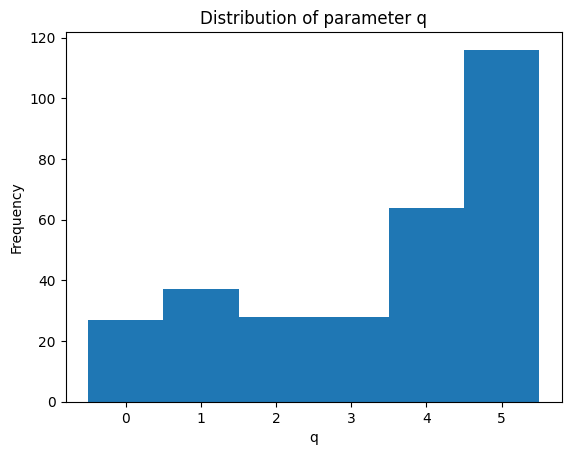

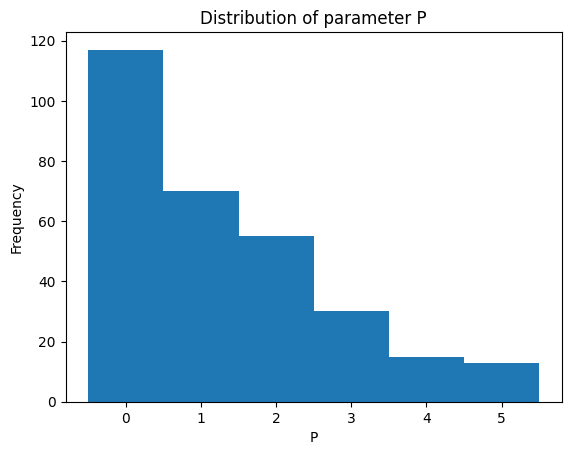

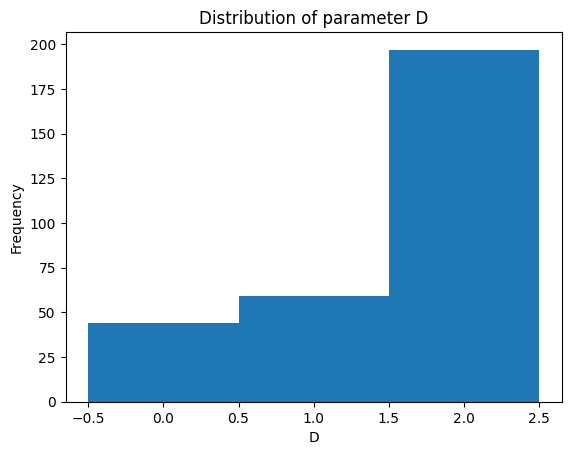

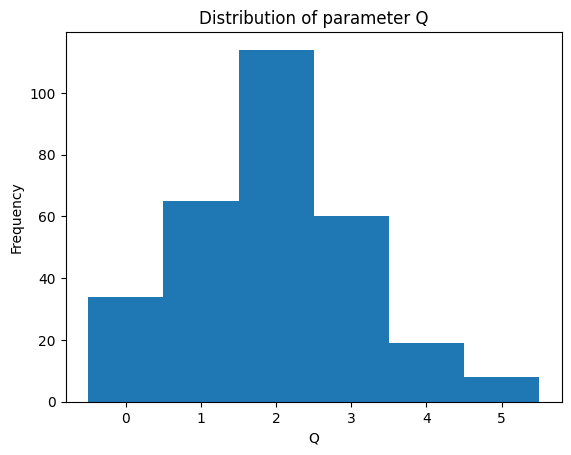

In [34]:
param_names = ['p', 'd', 'q', 'P', 'D', 'Q']
for param in param_names:
    values = [x['misc']['vals'][param][0] for x in trials.trials if x['result']['status'] == 'ok']
    plt.hist(values, bins=range(int(max(values))+2), align='left')
    plt.title(f'Distribution of parameter {param}')
    plt.xlabel(param)
    plt.ylabel('Frequency')
    plt.show()


### 2D контурные графики

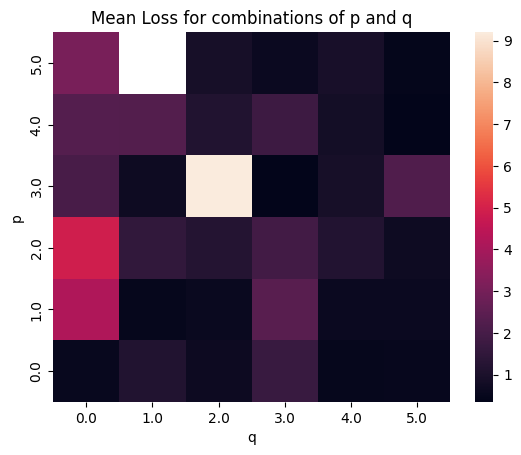

In [35]:
import seaborn as sns

df = pd.DataFrame({'p': [x['misc']['vals']['p'][0] for x in trials.trials if x['result']['status'] == 'ok'],
                   'q': [x['misc']['vals']['q'][0] for x in trials.trials if x['result']['status'] == 'ok'],
                   'loss': [x['result']['loss'] for x in trials.trials if x['result']['status'] == 'ok']})

sns.heatmap(df.pivot_table(values='loss', index='p', columns='q', aggfunc='mean').sort_index(ascending=False))
plt.title('Mean Loss for combinations of p and q')
plt.show()

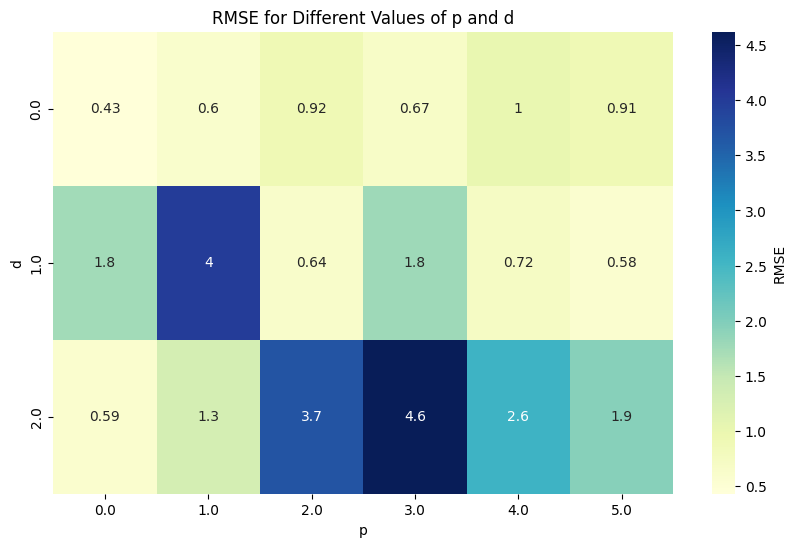

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

p_vals = [trial['misc']['vals']['p'][0] for trial in trials.trials if 'loss' in trial['result']]
d_vals = [trial['misc']['vals']['d'][0] for trial in trials.trials if 'loss' in trial['result']]
losses = [trial['result']['loss'] for trial in trials.trials if 'loss' in trial['result']]

df = pd.DataFrame({'p': p_vals, 'd': d_vals, 'loss': losses})

plt.figure(figsize=(10, 6))
heatmap = df.pivot_table(index='d', columns='p', values='loss', aggfunc='mean')
sns.heatmap(heatmap, cmap="YlGnBu", annot=True, cbar_kws={'label': 'RMSE'})

plt.title('RMSE for Different Values of p and d')
plt.xlabel('p')
plt.ylabel('d')
plt.show()


# Получение прогноза и RMSE с подобранными гиперпараметрами

RMSE: 0.35
MAE: 0.30
MAPE: 0.09


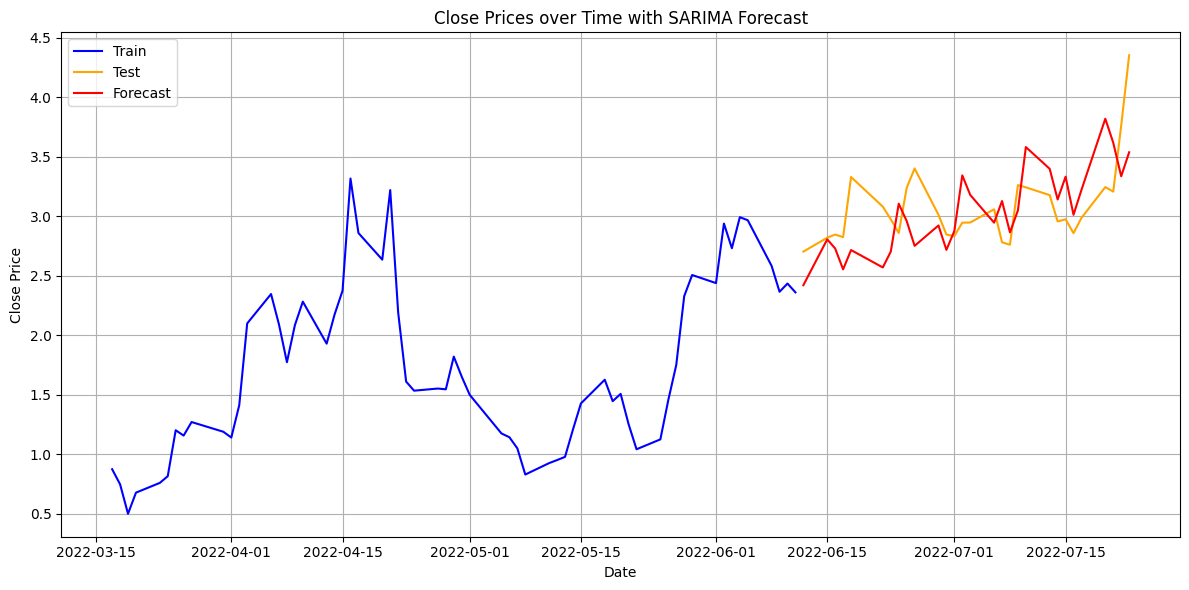

In [37]:
best_params = {
    'order': (int(best['p']), int(best['d']), int(best['q'])),
    'seasonal_order': (int(best['P']), int(best['D']), int(best['Q']), 6)
}
model = SARIMAX(train['close'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results = model.fit(disp=False)
forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

rmse = np.sqrt(mean_squared_error(test['close'], forecast))
mae = mean_absolute_error(test['close'], forecast)
mape = mean_absolute_percentage_error(test['close'], forecast)

print(f"RMSE: {rmse:.2f}")
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(train['dt'], train['close'], label='Train', color='blue')
plt.plot(test['dt'], test['close'], label='Test', color='orange')
plt.plot(test['dt'], forecast, label='Forecast', color='red')
plt.title('Close Prices over Time with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Получение submission

### SARIMA

In [40]:

full_train = pd.concat([train, test])
model_full = SARIMAX(full_train['close'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results_full = model_full.fit(disp=False)
start_point = len(full_train)
end_point = start_point + solution_len - 1

forecast_solution = results_full.predict(start=start_point, end=end_point, dynamic=True)

submission = pd.DataFrame({
    'ID': range(1, (solution_len) + 1),
    'close': forecast_solution.values
})

In [41]:
submission

,ID,close
0,1,4.041753
1,2,4.314590
2,3,4.441545
3,4,4.374345
4,5,4.335139
5,6,4.320493
6,7,4.000452
7,8,4.286969
8,9,4.458532
9,10,4.387463


In [24]:
submission.to_csv('sample_submission_sari_034.csv', index=False)

In [ ]:
plt.figure(figsize=(15, 7))

forecast_dates = pd.date_range(test['dt'].iloc[-1] + pd.Timedelta(days=1), periods=len(forecast_solution))
plt.plot(forecast_dates, forecast_solution.values, label='Forecast', color='red')

plt.title('Close Prices over Time with Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15, 7))

plt.plot(train['dt'], train['close'], label='Train', color='blue')

plt.plot(test['dt'], test['close'], label='Test', color='orange')

forecast_dates = pd.date_range(test['dt'].iloc[-1] + pd.Timedelta(days=1), periods=len(forecast_solution))
plt.plot(forecast_dates, forecast_solution.values, label='Forecast', color='red')

plt.title('Close Prices over Time with Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
submission 

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), int(params['seasonal_period']))
    
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []
    
    for train_index, val_index in tscv.split(train):
        train_split, val_split = train.iloc[train_index], train.iloc[val_index]
        
        try:
            model = SARIMAX(train_split['close'], order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            forecast = results.predict(start=len(train_split), end=len(train_split)+len(val_split)-1, dynamic=True)
            rmse = np.sqrt(mean_squared_error(val_split['close'], forecast))
            rmse_scores.append(rmse)
        except:
            return {'status': STATUS_FAIL}
    
    mean_rmse = np.mean(rmse_scores)
    return {'loss': mean_rmse, 'status': STATUS_OK}

space = {
    'p': hp.quniform('p', 0, 3, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1),
    'P': hp.quniform('P', 0, 3, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 3, 1),
    'seasonal_period': hp.choice('seasonal_period', [12, 24, 36])
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Лучшие параметры:")
print(best)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from bayes_opt import BayesianOptimization

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['close']])

def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  

X_train, y_train = create_dataset(train_scaled, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))

print(f"Shape of X_train after reshape: {X_train.shape}")

def build_and_train_lstm(lstm_units, dropout_rate, learning_rate, look_back=10):

    model = Sequential()
    model.add(LSTM(int(lstm_units), return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(int(lstm_units), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(int(lstm_units), return_sequences=False))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    huber_loss = tf.keras.losses.Huber(delta=1.0)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=huber_loss)

    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=[early_stopping], verbose=0)
    
    test_scaled = scaler.transform(test[['close']])
    X_test, y_test = create_dataset(test_scaled, look_back)
    X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return -rmse  
pbounds = {
    'lstm_units': (50, 150),
    'dropout_rate': (0.1, 0.5),
    'learning_rate': (0.0001, 0.01)
}

optimizer = BayesianOptimization(
    f=lambda lstm_units, dropout_rate, learning_rate: build_and_train_lstm(lstm_units, dropout_rate, learning_rate, look_back),
    pbounds=pbounds,
    verbose=2,
    random_state=1,
)

optimizer.maximize(init_points=5, n_iter=15)

best_params = optimizer.max['params']
print(f"Лучшие параметры: {best_params}")

lstm_units = int(best_params['lstm_units'])
dropout_rate = best_params['dropout_rate']
learning_rate = best_params['learning_rate']

lstm_model = Sequential()
lstm_model.add(LSTM(lstm_units, return_sequences=True, input_shape=(look_back, 1))) 
lstm_model.add(Dropout(dropout_rate))
lstm_model.add(LSTM(lstm_units, return_sequences=True))
lstm_model.add(Dropout(dropout_rate))
lstm_model.add(LSTM(lstm_units, return_sequences=False))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dropout(dropout_rate))
lstm_model.add(Dense(25, activation='relu'))
lstm_model.add(Dense(1))

huber_loss = tf.keras.losses.Huber(delta=1.0)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
lstm_model.compile(optimizer=optimizer, loss=huber_loss)

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=[early_stopping], verbose=1)

X_test, y_test = create_dataset(scaler.transform(test[['close']]), look_back)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_test = scaler.inverse_transform(y_test)

rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
print(f'RMSE для модели LSTM: {rmse_lstm}')
print(f'MAE для модели LSTM: {mae_lstm}')

In [ ]:
full_data = pd.concat([train[['close']], test[['close']]])
full_data_scaled = scaler.fit_transform(full_data[['close']])
X_full, _ = create_dataset(full_data_scaled, look_back)
X_full = np.reshape(X_full, (X_full.shape[0], look_back, 1))
forecast = lstm_model.predict(X_full)
forecast = scaler.inverse_transform(forecast)

solution_len = 13 
submission = pd.DataFrame({
    'ID': range(1, solution_len + 1),
    'close': forecast[-solution_len:].flatten() 
})
submission.to_csv('lstm_d2_035_submission.csv', index=False)

In [ ]:
#RMSE 0.38
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def objective(params):
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), 12)
    
    try:
        model = SARIMAX(train['close'], order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)
        
        forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
        
        rmse = np.sqrt(mean_squared_error(test['close'], forecast))
        mae = mean_absolute_error(test['close'], forecast)
        mape = mean_absolute_percentage_error(test['close'], forecast)
        
        loss = rmse + mae + mape
        
        return {'loss': loss, 'status': STATUS_OK}
    except Exception as e:
        print(f"Ошибка: {e}")
        return {'status': STATUS_FAIL}

space = {
    'p': hp.quniform('p', 0, 3, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1),
    'P': hp.quniform('P', 0, 3, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 3, 1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=150, trials=trials)